## Q-Learning

Dans ce notebook, nous allons implémenter une seconde méthode qui apprend par expérimentation et utilise le *bootstrapping*.
Elle s'appelle Q-Learning.
    
Cette une méthode qui suit une stratégie *off-policy*, dans laquelle nous allons utilisé une politique exploratoire $b(s)$ pour parcourir l'environnement et une politique $\pi(s)$ à optimiser par apprentissage.

## Gérer les imports

In [1]:
import gym
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from IPython import display

from bucket_env import BucketEnv3
from bucket_env import plot_stats, testing, rendering
%matplotlib inline

pygame 2.1.4.dev1 (SDL 2.26.0, Python 3.11.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


objc[70188]: Class SDLApplication is implemented in both /opt/local/lib/libSDL2-2.0.0.dylib (0x1107907c0) and /opt/homebrew/Cellar/sdl2/2.26.1/lib/libSDL2-2.0.0.dylib (0x116520800). One of the two will be used. Which one is undefined.
objc[70188]: Class SDLAppDelegate is implemented in both /opt/local/lib/libSDL2-2.0.0.dylib (0x110790810) and /opt/homebrew/Cellar/sdl2/2.26.1/lib/libSDL2-2.0.0.dylib (0x116520850). One of the two will be used. Which one is undefined.
objc[70188]: Class SDLTranslatorResponder is implemented in both /opt/local/lib/libSDL2-2.0.0.dylib (0x110790888) and /opt/homebrew/Cellar/sdl2/2.26.1/lib/libSDL2-2.0.0.dylib (0x1165208c8). One of the two will be used. Which one is undefined.
objc[70188]: Class SDLMessageBoxPresenter is implemented in both /opt/local/lib/libSDL2-2.0.0.dylib (0x1107908b0) and /opt/homebrew/Cellar/sdl2/2.26.1/lib/libSDL2-2.0.0.dylib (0x1165208f0). One of the two will be used. Which one is undefined.
objc[70188]: Class SDL_cocoametalview is imp

## Initialiser l'environnement
Pour créer l'environnement, il faut simplement créer une instance de `BucketEnv3`

In [2]:
env = BucketEnv3()

## Definition de la table de valeurs $Q(s, a)$

#### Création de la table $Q(s, a)$
Cette table doit permettre de lier chaque état à une action.
Pour cela, on utilise la librairie `numpy` pour créer un tableau avec une forme (*shape*) correspondant à cette paire.
La forme attendu est donnée par un tuple.

Exemple
```python
>>> s = (2,2)
>>> np.zeros(s)
array([[ 0.,  0.],
       [ 0.,  0.]])
```


In [3]:
action_values = np.zeros((7,7,7,5))

## Définition des politiques

#### Création de la politique *cible* $\pi(s)$
Celle-ci se base uniquement sur la table de valeurs, elle fait **uniquement** de l'intensification. Il n'est donc pas nécessaire de disposer du paramètre $\epsilon$.

In [4]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))


#### Création de la politique *exploratoire* $b(s)$
A l'inverse, cette politique est purement aléatoire, elle fait **uniquement** de l'exploration. Là encore, il n'est pas nécessaire de disposer du paramètre $\epsilon$.

In [5]:
def exploratory_policy(state):
    return np.random.choice(5)

## Implementation de l'algorithme

</br>

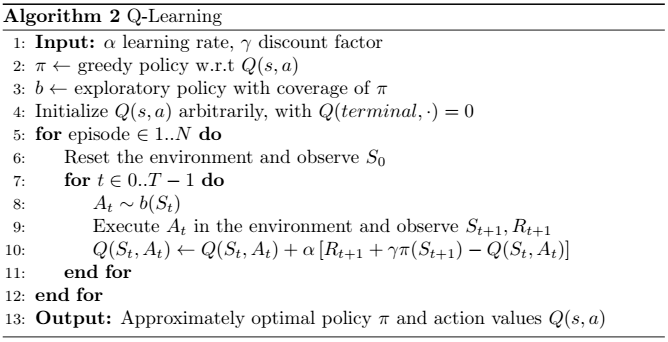
</br>
<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>



In [6]:
def q_learning(exploratory_policy, target_policy, action_values, episodes, alpha=0.1, gamma=0.99):
    stats = {"Returns" : []}
    for episode in tqdm(range(1, episodes+1)):
        state = env.reset()
        done = False
        ep_return = 0
        while not done:
            action = exploratory_policy(state)
            next_state, reward, done, _ = env.step(action)
            #l.10
            qsa = action_values[state][action]
            next_action = target_policy(next_state) if not done else None
            next_qsa = action_values[next_state][next_action] if not done else 0.

            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)

            ep_return += reward
            state = next_state
        stats["Returns"].append(ep_return)

    return stats

100%|██████████| 10000/10000 [00:00<00:00, 12028.66it/s]


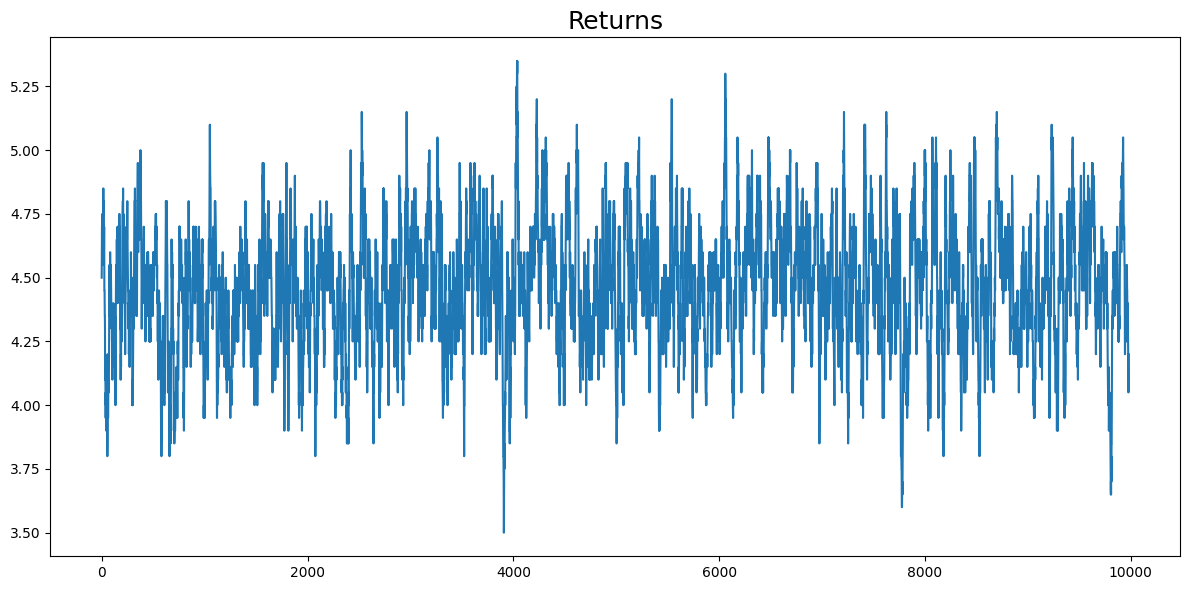

In [12]:
action_values = np.zeros((7,7,7,5))
stats = q_learning(exploratory_policy,target_policy,action_values,episodes=10000)
plot_stats(stats)

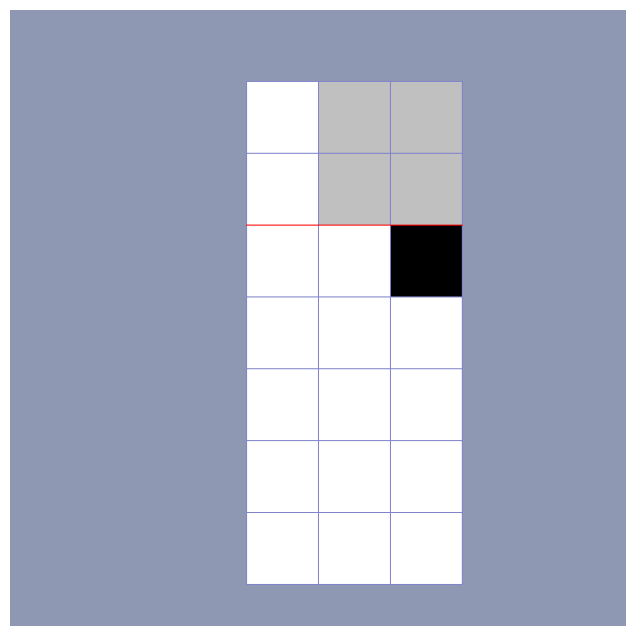

In [14]:
rendering(env,target_policy,episodes=4)